- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

Neal Gordon  
2017-02-20  

- - - -

## statics

* [Example 1: A simple supported beam with shear-bending plots](#Statics-Example-1)
* [Example 2: Vector calculation method to calculate 3-D moments](#Statics-Example-2)
* [Distributed Loads Calculations](#Distributed-Loads-Calculations)


## Python Initilaization with module imports

In [1]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

Using matplotlib backend: Qt4Agg


- - - -
# Statics 
[index](#Mechpy)
- - - -

The sum of the forces is zero
$$
\Sigma F_x =0 , \Sigma F_y =0 , \Sigma F_z =0  
$$
The sum of the moments is zero
$$
\Sigma M_x =0 , \Sigma M_y =0 , \Sigma M_z =0  
$$

Dot Product

$$
\vec{A} \bullet \vec{B} = ABcos\left(\theta\right)= A_xB_x + A_yB_y+A_zB_z
$$

Cross-Product

$$
\vec{C}=\vec{A} \times \vec{B} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    A_{x} & A_{y} & A_{z}\\
    B_{x} & B_{y} & B_{z}
\end{vmatrix} 
$$

Moment of Force
$$
M_0 = Fd \\
\vec{M_0}=\vec{r}\times \vec{F} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    r_{x} & r_{y} & r_{z}\\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$

Moment of Force about a Specified axis
$$
\vec{M_a}=\vec{u}\bullet\vec{r}\times \vec{F} = 
\begin{vmatrix}
    u_{x} & u_{y} & u_{z} \\
    r_{x} & r_{y} & r_{z} \\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$


### Statics-Example 1
#### A simple supported beam with shear-bending plots

In [7]:
import os ; os.chdir('..')  # change to root from the examples folder
from mechpy.statics import simple_support, moment_calc

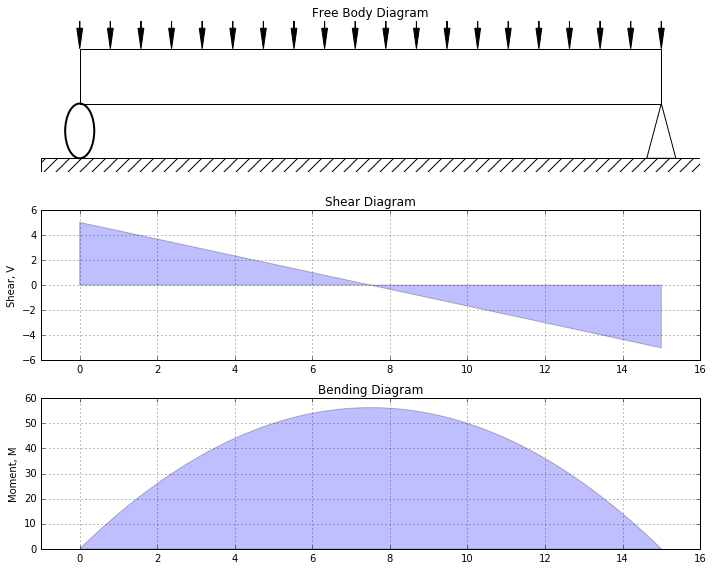

In [5]:
simple_support()

### Statics-Example 2
### Vector calculation method to calculate 3-D moments

$
\vec{M_{R_0}}=\Sigma \left( \vec{r} \times \vec{F} \right) = \vec{r_A}\times\vec{F_1} +\vec{r_A}\times\vec{F_2} + \vec{r_B}\times\vec{F_3}
$

Total Moment vector
[ 30 -40  60]
Total Force Vector about point O
[ 20 130 -10]
unit vector of the moment
[ 0.38411064 -0.51214752  0.76822128]
angles at which the moments react
[  67.41146121  120.80698112   39.80557109]


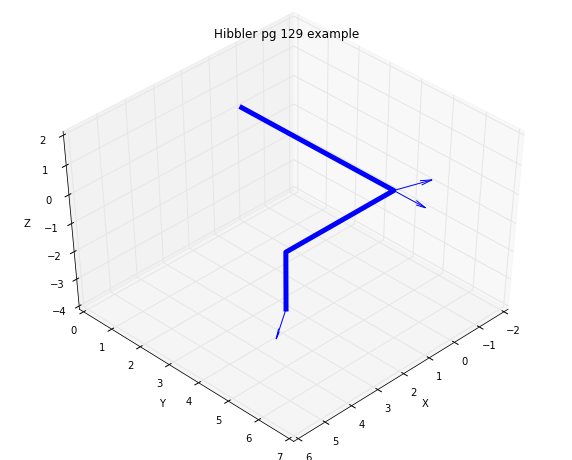

In [6]:
moment_calc()

### Distributed Loads Calculations

$
F_R = \Sigma F=\int_L w(x) \,dx  = \int_A dA \,dx  
$

example, hibbler, pg 187

$$
F_R=\int_A dA \, =  \int_{0}^{2} \, 60x^2 \, dx = 160 N
$$

$$
 \overline{x} = \frac{\int_A x \, dA}{\int_A dA} =  \frac{\int_{0}^{2} x60x^2 \, dx}{\int_{0}^{2} \, 60x^2 \, dx} = \frac{240}{160}
$$

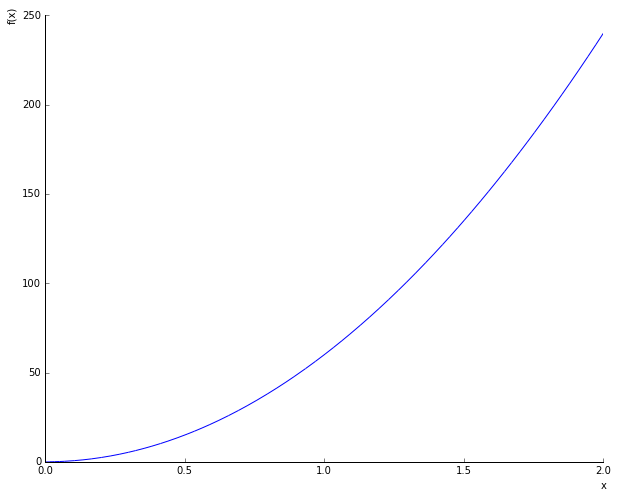

In [4]:
x = sp.var('x')
w = 60*x**2# N/m
sp.plot(w, (x,0,2));

In [5]:
w.subs(x,2)

240

In [6]:
sp.Integral(w,(x,0,2))

2         
⌠         
⎮     2   
⎮ 60⋅x  dx
⌡         
0         

In [7]:
sp.integrate(w)

    3
20⋅x 

In [8]:
sp.integrate(w,(x,0,2))

160

In [9]:
sp.Integral(x*w,(x,0,2))

2         
⌠         
⎮     3   
⎮ 60⋅x  dx
⌡         
0         

In [10]:
sp.integrate(w*x)

    4
15⋅x 

In [11]:
sp.integrate(x*w,(x,0,2))

240

In [12]:
FR= float(sp.integrate(w,(x,0,2)))
xbar = float(sp.integrate(x*w,(x,0,2)))/FR
print('center of load of an exponential distributed load is %f' % xbar)

center of load of an exponential distributed load is 1.500000


In [13]:
#hibbler pg 346

import numpy as np

r = np.array([    0, 3 , 5.25])
F = np.array([-13.5, 0 ,6.376])
M = -np.cross(r,F)

# moments 
print('M_x = %f \nM_y = %f \nM_z = %f' % (M[0], M[1], M[2] ))

M_x = -19.128000 
M_y = 70.875000 
M_z = -40.500000
